# Principles of Spatial Date Mining and Machine Learning WS2022/2023 
# Lectuer team: Martin Werner, Hao Li

## Excercise 04: ML classifier - Part 2: SVM with different kernels

In this exercise, we will try to implement three different clustering algorithm with the IRIS dataset (http://archive.ics.uci.edu/ml/datasets/Iris), which we have used as an example during the last excercise 03 (clustering). For this time, we will train a ML classifier on this dataset. 

First, we would load the datasets together, do some basic data exploration, and plot the raw data point, then we will split the data into train and test. 

Then, there are mainly two tasks for you in this excercise:

- to build a **Support Vector Machine with different Kernels** on the IRIS dataset and evaluate the classification performance w.r.t accuracy and confusion matrics.
    
- to plot the decision boundary of different SVM kernels (i.e., **Linear, Polynomial and RBF**) for comparision.

## Example Code:

In [15]:
! pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [16]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

### Load the dataset

In [17]:
# loading the Bouston dataset direclty from sklearn
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_classes = pd.DataFrame(iris.target)
# confirmed data loading
print("Now the Iris data is loaded")

Now the Iris data is loaded


### Now let us print the attributes,, and check which attributes are available

In [18]:
# Print the python data tpye and size of boston dataset together with the feature_names
print(type(iris_df))
print('\n')
print(iris_df.keys())
print('\n')
print(iris_df.shape)

<class 'pandas.core.frame.DataFrame'>


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


(150, 4)


## The features can be summarized as follows (http://archive.ics.uci.edu/ml/datasets/Iris):


The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. Iris class:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

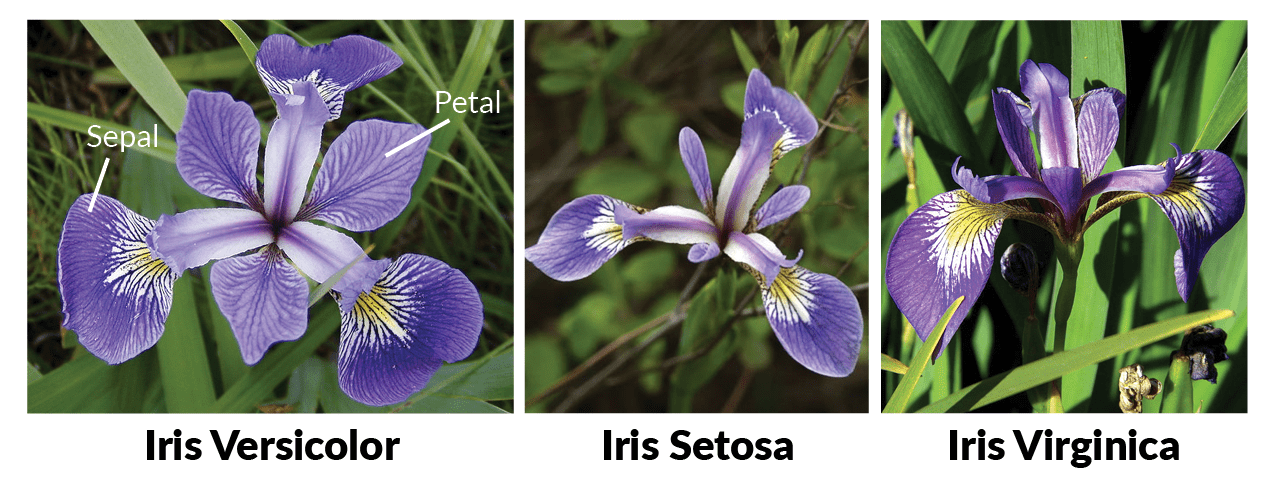
[link](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)



In [19]:
# get the head from the Irix dataframe
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
# print out the Iris class: 0 is setosa, 1 is versicolor, 2 is virginica
iris_classes

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [21]:
# get the values for Iris data and corresponding classes
iris_data = iris_df.values
target = iris_classes.values

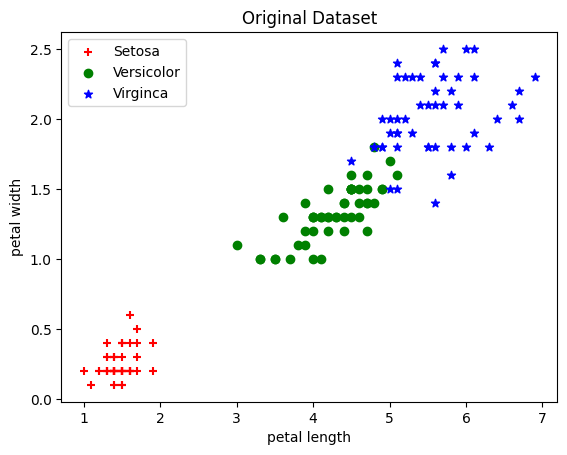

In [22]:
# visualising original dataset
for i in range(0,len(target)):
    if target[i]==0:
        c1=plt.scatter(iris_data[i,2],iris_data[i,3],c='r',marker='+')
    if target[i]==1:
        c2=plt.scatter(iris_data[i,2],iris_data[i,3],c='g',marker='o')
    if target[i]==2:
        c3=plt.scatter(iris_data[i,2],iris_data[i,3],c='b',marker='*')
plt.legend([c1,c2,c3],['Setosa','Versicolor','Virginca'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Original Dataset')
plt.show()

# Now, it is your turn!

## Task No.1: build a **Support Vector Machine with different Kernels** on the IRIS dataset and evaluate the classification performance w.r.t accuracy and confusion matrics.

### Q1.1: import Support Vector Classifier (SVC) from sklearn.svm, then use a linear kernel and calculate the accuracy and confusion_matrix.

In [23]:
# import KMeans algorithm from sklearn
from sklearn.model_selection import train_test_split

# Define input fature and Target class
X = iris_df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
y = target.ravel()

### BEGIN SOLUTION
# Split the train and test data, here as the dataset is small, let's just 0.5 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
### END SOLUTION


In [24]:
### BEGIN HIDDEN TESTS
assert X_train.shape == X_test.shape ==(75,2), 'incorrect size between X_train and X_test'
assert y_train.shape == y_test.shape ==(75,), 'incorrect size between y_train and y_test'
### END HIDDEN TESTS

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
# Input the kernel from the user
svm_kernel = 'linear'


### BEGIN SOLUTION
# Built the SVC and evaluate the performance
model = SVC(kernel=svm_kernel)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Accuracy using {}:".format(svm_kernel), accuracy_score(pred, y_test))
print("Confusiom matrix {} \n" .format(svm_kernel), confusion_matrix(pred, y_test))
### END SOLUTION

Accuracy using linear: 0.9733333333333334
Confusiom matrix linear 
 [[29  0  0]
 [ 0 23  2]
 [ 0  0 21]]


In [26]:
### BEGIN HIDDEN TESTS
assert accuracy_score(pred,y_test) >= 0.9, 'too low accuracy_score'
assert confusion_matrix(pred, y_test).size == 9, 'incorrect size of Confusiom matrix linear'
### END HIDDEN TESTS

### Q1.2: try different kernels for the SVC model and compare their performance w.r.t accuracy and confusion matrix

In [27]:
### BEGIN SOLUTION
# Here are three options for kernels
svm_kernels = ['linear', 'rbf', 'poly']
a =[]
for kernel in svm_kernels:
  # Built the SVC and evaluate the performance
  model = SVC(kernel=kernel)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))
  print("Confusiom matrix {} \n" .format(kernel), confusion_matrix(pred, y_test))
  a.append(accuracy_score(pred,y_test))
### END SOLUTION

Accuracy using linear: 0.9733333333333334
Confusiom matrix linear 
 [[29  0  0]
 [ 0 23  2]
 [ 0  0 21]]
Accuracy using rbf: 0.9866666666666667
Confusiom matrix rbf 
 [[29  0  0]
 [ 0 23  1]
 [ 0  0 22]]
Accuracy using poly: 1.0
Confusiom matrix poly 
 [[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]


In [28]:
# Here are three options for kernels
svm_kernels = ['linear', 'rbf', 'poly']
a_test = []
for kernel in svm_kernels:
  # Built the SVC and evaluate the performance
  model = SVC(kernel=kernel)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_test =accuracy_score(pred, y_test)
  confu_test =confusion_matrix(pred, y_test)
  a_test.append(acc_test)
### BEGIN HIDDEN TESTS
assert a == a_test, 'incorrect results of SVC model'
### END HIDDEN TESTS

## Task No.2: plot the **decision boundary** of different SVM kernels (i.e., **Linear, Polynomial and RBF**) for comparision

### Q2.1: Given two plot functions(make_meshgrid and plot_contours), plot the decision boundary for the linear SVM.

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy using linear: 0.9733333333333334


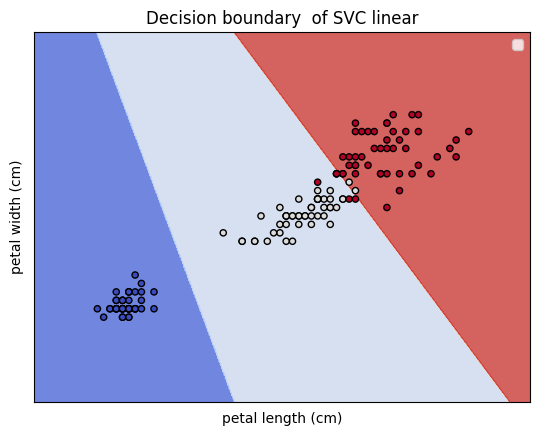

In [30]:
# Input the kernel from the user

### BEGIN SOLUTION
svm_kernel = 'linear'

# Train the SVM and Predict in the test data
model = SVC(kernel=svm_kernel)
model.fit(X_train.values, y_train)

pred = model.predict(X_test.values)
print("Accuracy using {}:".format(svm_kernel), accuracy_score(pred, y_test))

# Plot the decision boundary
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundary  of SVC ' + model.kernel)
# Set-up grid for plotting.
X0, X1 = X.iloc[:,0], X.iloc[:,1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('petal width (cm)')
ax.set_xlabel('petal length (cm)')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()
### END SOLUTION

In [31]:
### BEGIN HIDDEN TESTS
assert model.kernel == "linear", 'incorrect kernel in model'
### END HIDDEN TESTS

### Q2.2: plot the decision boundary for SVM with different kernels with a **for** loop 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy using linear: 0.9733333333333334


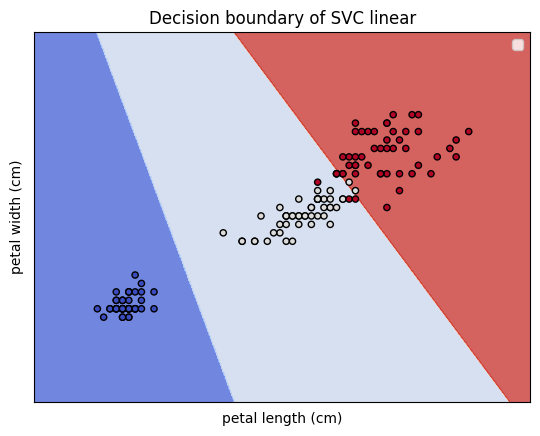

Accuracy using rbf: 0.9866666666666667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


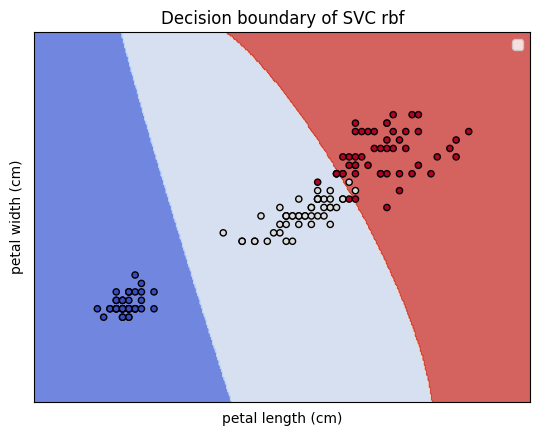

Accuracy using poly: 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


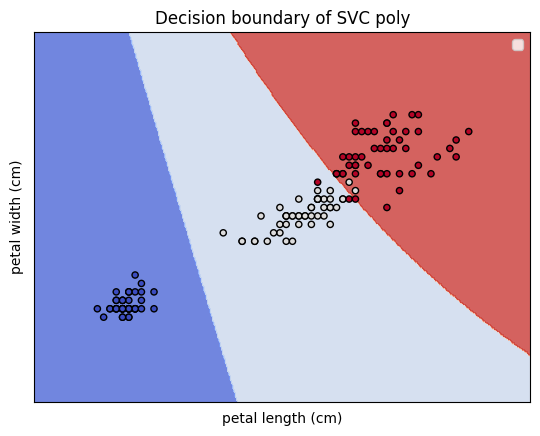

In [32]:
### BEGIN SOLUTION
# Here are three options for kernels
svm_kernels = ['linear', 'rbf', 'poly']
a = []
# The for loop for SVM with different kernels
for kernel in svm_kernels:
  # Train the SVM and Predict in the test data
  model = SVC(kernel=kernel)
  model.fit(X_train.values, y_train)
  a.append(kernel)
  pred = model.predict(X_test.values)

  # Plot the decision boundary
  fig, ax = plt.subplots()
  # title for the plots
  title = ('Decision boundary of SVC ' + model.kernel)
  print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))
  # Set-up grid for plotting.
  X0, X1 = X.iloc[:,0], X.iloc[:,1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_ylabel('petal width (cm)')
  ax.set_xlabel('petal length (cm)')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
  ax.legend()
  plt.show()
### END SOLUTION

In [33]:
### BEGIN HIDDEN TESTS
assert a == svm_kernels, 'incorrect kernel in model'
### END HIDDEN TESTS

## Well Done! 

Now you manage SVM algorithm we introducted in the lecture and you know the impact of different kernels in the classification performance. 

## Good job! See you in the next lecture!